1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-life $\tau$ of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

33.06241626360317


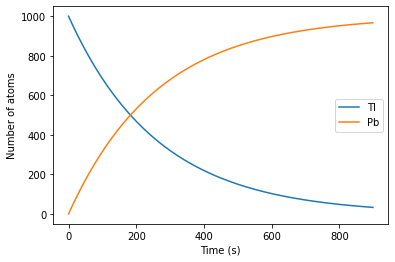

In [73]:
#FATTO USANDO COSTANTE DI DECADIMENTO LAMBDA

import numpy as np
import matplotlib.pyplot as plt

# Define half-life (seconds),p(t), number of samples, Tl and Pb arrays 
tau = 3.052 * 60 
N = 1000 
l = np.log(2)/tau #qua mi sono derivato la costante di decadimento
tl = np.array([N])
pb = np.array([0])

def p(t, tau):
    return 1 - 2**(-t/tau)

#Define time step and total time for the loop (5 min)
dt = 1
T = 15*60

for t in np.arange(dt, T, dt):
    n_decay = tl[-1]*l
    tl = np.append(tl, tl[-1] - n_decay)
    pb = np.append(pb, pb[-1] + n_decay)

#QUESTO PER VEDERE SE è ANDATO A ZERO
print(tl[-1])
# Plot the results
time = np.arange(0, T, dt)
plt.plot(time, tl, label='Tl')
plt.plot(time, pb, label='Pb')
plt.xlabel('Time (s)')
plt.ylabel('Number of atoms')
plt.legend()
plt.show()

33.2765790984223


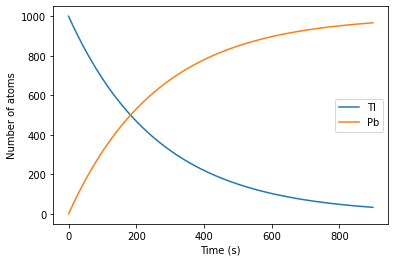

In [4]:
#FATTO USANDO p
import numpy as np
import matplotlib.pyplot as plt

#Define half-life (seconds),p(t), number of samples, Tl and Pb arrays 
tau = 3.052 * 60 
N = 1000 
l = np.log(2)/tau #qua mi sono derivato la costante di decadimento
tl = np.array([N])
pb = np.array([0])

def p(t, tau):
    return 1 - 2**(-t/tau)

#Define time step and total time for the loop (15 min)
dt = 1
T = 15*60

for t in np.arange(dt, T, dt):
    n_decay = N*p(t, tau)
    tl = np.append(tl, N - n_decay)
    pb = np.append(pb, 0 + n_decay)

# Plot the results
time = np.arange(0, T, dt)
plt.plot(time, tl, label='Tl')
plt.plot(time, pb, label='Pb')
plt.xlabel('Time (s)')
plt.ylabel('Number of atoms')
plt.legend()
plt.show()

34


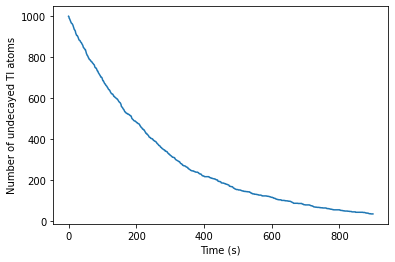

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Constants and inverse of p
def icdf(y, tau):
    return -tau*np.log(1 - y)/np.log(2)


# Generate random decay times for the Tl atoms using the inverse transform method
decay_times = icdf(np.random.rand(1000), tau)


# Initialize the number of undecayed atoms
tl2 = np.array([N])

# For each second, count the number of atoms that have not decayed
for t in np.arange(dt, T, dt):
    n_undecayed = np.sum(decay_times > t)
    tl2 = np.append(tl2, n_undecayed)

# Plot the results
time = np.arange(0, T, dt)
plt.plot(time, tl2)
plt.xlabel('Time (s)')
plt.ylabel('Number of undecayed Tl atoms')
plt.show()


2\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function: 

$$f(x) =\sin^2{\left( \frac{1}{1-x} \right)}$$

* Plot the function and compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate (hint: repeat the integral $N$ times, and from the distribution of the integrals take the mean value and the standard deviation, the latter rescaled by the appropriate factor)
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one.

Integral: 1.34506
estimate:  1.34626
error:  0.0012000000000000899


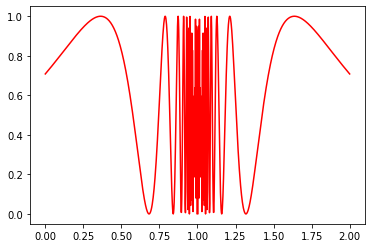

In [6]:
import numpy as np
import matplotlib.pyplot as plt

#Define the interval and the function
def f(x):
    return (np.sin(1/(1 - x)))**2

x = np.linspace(0,2,1000)
upper = 1
A = 2 * upper

#plot the function
plt.plot(x, f(x), 'r-')

# Define number of iterations and the 2D uniform random distribution
n = 100000
u = np.random.uniform(0, 2, n)
r = np.random.uniform(0, upper, n)

#hit/miss method
count = 0
for i in np.arange(n):
    if r[i] < f(u[i]): count += 1

I = 2 * upper * count / n
print("Integral:", I)

#Evaluate the error: initialize the array of integrals
IG = np.array([I])
N = 10

for i in np.arange(N):
    count = 0
    for i in np.arange(n):
        x = 2 * np.random.random() # x is random uniform between 0 and 2
        y = np.random.random()     # y is random uniform between 0 and 1
        if y < f(x): count += 1
    IG = np.append(IG, 2 * upper * count / n)
    
#compute the mean value and the error of the estimate
mean = np.mean(IG)
std = np.std(IG)
error = std / np.sqrt(N)

print("estimate: ", mean)
print("error: ", error)

In [4]:
#mean value method
INT = 2 * np.mean(f(u))
sigma = 2 * np.std(f(u)) / np.sqrt(n)
print(INT, sigma)

#even with N = 1, the first method is more accurate

1.3475007372841734 0.0020702867894266414


3\. **Monte Carlo integration in high dimension**

* Compute the area of a circle of unit radius, by integrating the function:

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere.

In [24]:
import numpy as np
import matplotlib.pyplot as plt

#Define the interval and the function
def f(x, y):
    if x**2 + y**2 <= 1: return 1
    else: return 0

x = np.linspace(-1, 1, 1000)
xv, yv = np.meshgrid(x, x)
upper = 1
A = 2 * 2 * upper


# Define number of iterations and the 3D uniform random distribution
n = 100000
a = np.random.uniform(-1, 1, n)
b = np.random.uniform(-1, 1, n)
r = np.random.uniform(0, upper, n)

#hit/miss method
count = 0
for i in np.arange(n):
    if r[i] < f(a[i], b[i]): count += 1

Int = A * count / n
print("Integral:", Int)

Integral: 3.1338


In [38]:
import numpy as np
import matplotlib.pyplot as plt

#Generalizing the result: define the function
def f(x):
    if np.sum(x**2) <= 1: return 1
    else: return 0
    
upper = 1
A = 2**10
    
# Define number of iterations and the 11D uniform random distribution
n = 100000
x = np.array([np.random.uniform(-1, 1, n) for i in range(10)]).T
r = np.random.uniform(0, upper, n)

#hit/miss method
count = 0
for i in np.arange(n):
    if r[i] < f(x[i]): count += 1

#Compute the volume of the 10D ball
I_10 = A * count / n
print("Integral:", I_10)

Integral: 2.58048


4\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should expect a result around 0.84.

In [20]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return (x**(-1/2)) / (np.exp(x) + 1)

def w(x):
    return 1 / np.sqrt(x)

#the integral of w() in the interval [0,1] is 2
w_int = 2

#Define number of iterations
num_values = 100000

#Generate numbers w(x) distributed in (0,1) and create two vectors (F and W)
#containg f() and g() evaluated in those values
F = np.array([])
W = np.array([])
values = np.array([])
for i in range(num_values):
    x = random.uniform(0, 1)
    v = random.uniform(0, 100) #upper is not 100, chosen arbitrarily
    if v <= w(x):
        values = np.append(values, x)
        F = np.append(funz, f(x))
        W = np.append(wunz, w(x))
        
integral = w_int * np.mean(F / W)

print(integral)


0.8365331210835548
